In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('TATASTEEL.BO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,24.564999,26.400000,24.510000,26.299999,1.994953,47540800.0
1,2009-05-05,26.799999,28.860001,26.500000,28.615000,2.170554,64828750.0
2,2009-05-06,28.650000,29.000000,26.809999,27.064999,2.052981,44272320.0
3,2009-05-07,27.790001,29.900000,27.209999,29.434999,2.232754,78072560.0
4,2009-05-08,30.000000,30.290001,28.070000,28.250000,2.142868,61331990.0


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2639 non-null   object 
 1   Open       2631 non-null   float64
 2   High       2631 non-null   float64
 3   Low        2631 non-null   float64
 4   Close      2631 non-null   float64
 5   Adj Close  2631 non-null   float64
 6   Volume     2631 non-null   float64
dtypes: float64(6), object(1)
memory usage: 144.4+ KB


In [4]:
data = data.drop('Adj Close',axis=1)
data = data.dropna()
train_data = data[(data['Date'] >= '2009-05-04') & (data['Date'] <= '2017-04-03')]
test_data = data[(data['Date'] >= '2017-04-04') & (data['Date'] <= '2020-01-04')]
trainData = train_data.iloc[:,3:4].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2631 non-null   object 
 1   Open    2631 non-null   float64
 2   High    2631 non-null   float64
 3   Low     2631 non-null   float64
 4   Close   2631 non-null   float64
 5   Volume  2631 non-null   float64
dtypes: float64(5), object(1)
memory usage: 143.9+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape[0]

1954

In [7]:
X_train = []
y_train = []

for i in range (60,len(trainData)): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1894, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
60/60 - 15s - loss: 0.0184 - 15s/epoch - 245ms/step
Epoch 2/20
60/60 - 5s - loss: 0.0048 - 5s/epoch - 84ms/step
Epoch 3/20
60/60 - 5s - loss: 0.0045 - 5s/epoch - 80ms/step
Epoch 4/20
60/60 - 5s - loss: 0.0040 - 5s/epoch - 79ms/step
Epoch 5/20
60/60 - 5s - loss: 0.0035 - 5s/epoch - 83ms/step
Epoch 6/20
60/60 - 5s - loss: 0.0036 - 5s/epoch - 84ms/step
Epoch 7/20
60/60 - 5s - loss: 0.0029 - 5s/epoch - 90ms/step
Epoch 8/20
60/60 - 6s - loss: 0.0030 - 6s/epoch - 95ms/step
Epoch 9/20
60/60 - 6s - loss: 0.0029 - 6s/epoch - 95ms/step
Epoch 10/20
60/60 - 6s - loss: 0.0028 - 6s/epoch - 92ms/step
Epoch 11/20
60/60 - 6s - loss: 0.0028 - 6s/epoch - 93ms/step
Epoch 12/20
60/60 - 6s - loss: 0.0026 - 6s/epoch - 94ms/step
Epoch 13/20
60/60 - 6s - loss: 0.0024 - 6s/epoch - 94ms/step
Epoch 14/20
60/60 - 6s - loss: 0.0024 - 6s/epoch - 95ms/step
Epoch 15/20
60/60 - 6s - loss: 0.0022 - 6s/epoch - 97ms/step
Epoch 16/20
60/60 - 6s - loss: 0.0024 - 6s/epoch - 92ms/step
Epoch 17/20
60/60 - 6s - loss:

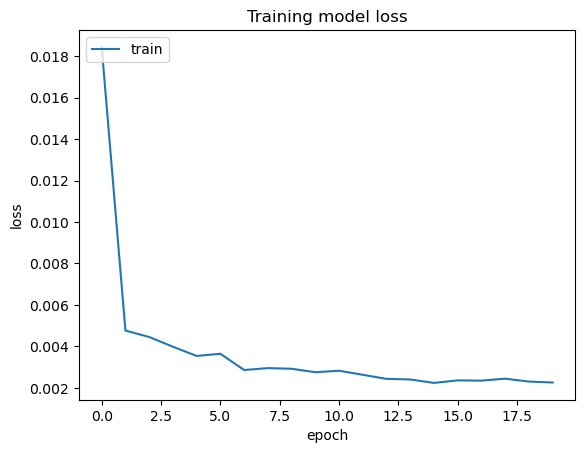

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
# testData = pd.read_csv('GS.csv')
# testData = testData.dropna()
testData = test_data.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(617, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

20/20 [==============================] - 3s 26ms/step


array([[0.68099546],
       [0.6972336 ],
       [0.7119243 ],
       [0.7235146 ],
       [0.7325173 ],
       [0.7384372 ],
       [0.74310696],
       [0.74586654],
       [0.7474668 ],
       [0.7494501 ],
       [0.7505128 ],
       [0.7504814 ],
       [0.75097245],
       [0.75446445],
       [0.7550484 ],
       [0.75199294],
       [0.74557525],
       [0.7399237 ],
       [0.7399719 ],
       [0.7429823 ],
       [0.7441441 ],
       [0.74810535],
       [0.7551995 ],
       [0.76196134],
       [0.76437694],
       [0.7680478 ],
       [0.7802384 ],
       [0.8017052 ],
       [0.82191753],
       [0.8362623 ],
       [0.84126693],
       [0.84740233],
       [0.8572262 ],
       [0.8666709 ],
       [0.87352407],
       [0.876182  ],
       [0.8748389 ],
       [0.8759436 ],
       [0.8809402 ],
       [0.8869058 ],
       [0.8899407 ],
       [0.89303076],
       [0.89581275],
       [0.90187085],
       [0.90804195],
       [0.9145066 ],
       [0.9201635 ],
       [0.925

In [14]:
predicted_price = sc.inverse_transform(y_pred)

In [15]:
#Get root mean sqaure error (RMSE)
rmse = np.sqrt(np.mean(predicted_price-y_test)**2)
rmse

0.8957027680493915

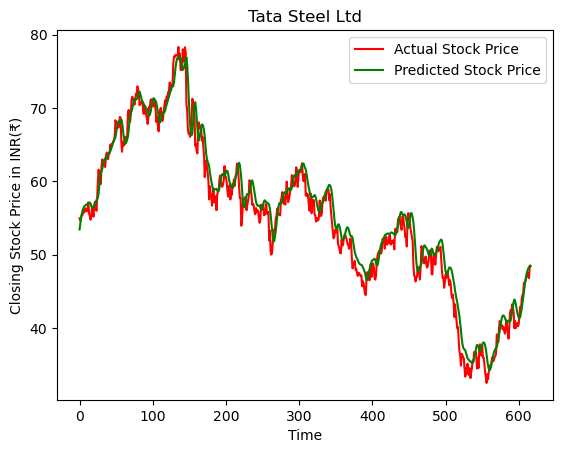

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Tata Steel Ltd')
plt.xlabel('Time')
plt.ylabel('Closing Stock Price in INR(₹)')
plt.legend()
plt.show()